# Exploring Seaborn Datasets

This serves to test understanding of visualization and exploration of data.
The following are the main objectives:
(1) Import Data Set from Seaborn.
(2) Explore Basic of the Data using Statistics.
(3) Create a new DataFrame with blank values dropped.
(4) Create new DataFrame with blank values filled with the Mean and Mode.
(5) Create 10 different types of plots for the data.

## Importing Relevant Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Display Available Datsets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
#Importing Chosen Data Set
df = sns.load_dataset('healthexp')

### Exploring the Data

In [6]:
df.shape

(274, 4)

In [7]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [8]:
df.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


In [10]:
df.describe(include='all')

,Year,Country,Spending_USD,Life_Expectancy
count,274.000000,274,274.000000,274.000000
unique,NaN,6,NaN,NaN
top,NaN,Japan,NaN,NaN
freq,NaN,51,NaN,NaN
mean,1996.992701,NaN,2789.338905,77.909489
std,14.180933,NaN,2194.939785,3.276263
min,1970.000000,NaN,123.993000,70.600000
25%,1985.250000,NaN,1038.357000,75.525000
50%,1998.000000,NaN,2295.578000,78.100000
75%,2009.000000,NaN,4055.610000,80.575000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [15]:
df[['Year','Spending_USD','Life_Expectancy']].var().round(2)

Year                   201.10
Spending_USD       4817760.66
Life_Expectancy         10.73
dtype: float64

In [18]:
df.count()

Year               274
Country            274
Spending_USD       274
Life_Expectancy    274
dtype: int64

In [20]:
df.groupby(by=['Country']).count()

,Year,Spending_USD,Life_Expectancy
Country,,,
Canada,44,44,44
France,35,35,35
Germany,50,50,50
Great Britain,43,43,43
Japan,51,51,51
USA,51,51,51


In [98]:
df['Country'].value_counts().sort_index(ascending=False)

Country
USA              51
Japan            51
Great Britain    43
Germany          50
France           35
Canada           44
Name: count, dtype: int64

In [38]:
df.groupby(by=['Country']).sum('Spending_USD')

,Year,Spending_USD,Life_Expectancy
Country,,,
Canada,87926,118174.247,3463.1
France,70065,106580.077,2784.8
Germany,99754,133364.010,3836.3
Great Britain,85941,87470.276,3337.7
Japan,101745,94873.153,4057.3
USA,101745,223817.097,3868.0


In [43]:
country_spending = df.groupby('Country')['Spending_USD'].sum().reset_index().sort_values(by='Spending_USD', ascending=False)
country_spending

,Country,Spending_USD
5,USA,223817.097
2,Germany,133364.010
0,Canada,118174.247
1,France,106580.077
4,Japan,94873.153
3,Great Britain,87470.276


In [59]:
countries_sorted_by_spending = country_spending['Country'].to_list()
print(countries_sorted_by_spending)

['USA', 'Germany', 'Canada', 'France', 'Japan', 'Great Britain']


In [32]:
df.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

### Visualization

#### Boxplot

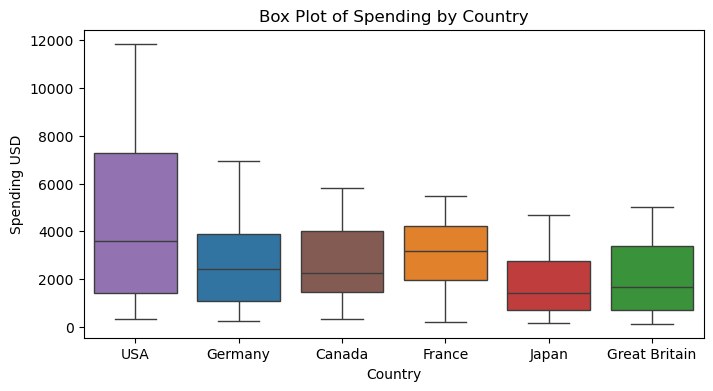

In [64]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x=df.Country,y=df.Spending_USD, order=countries_sorted_by_spending, hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Spending USD')
plt.title('Box Plot of Spending by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

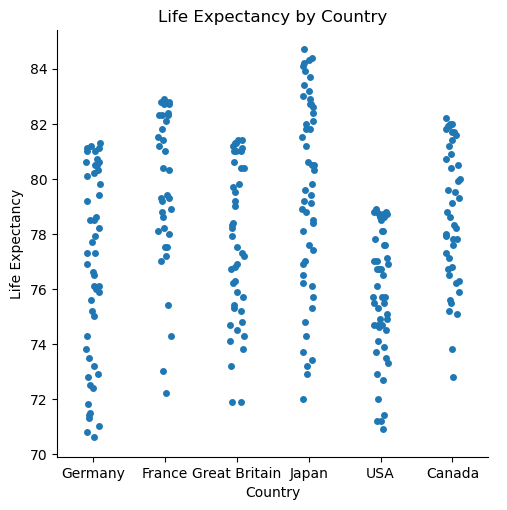

In [68]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

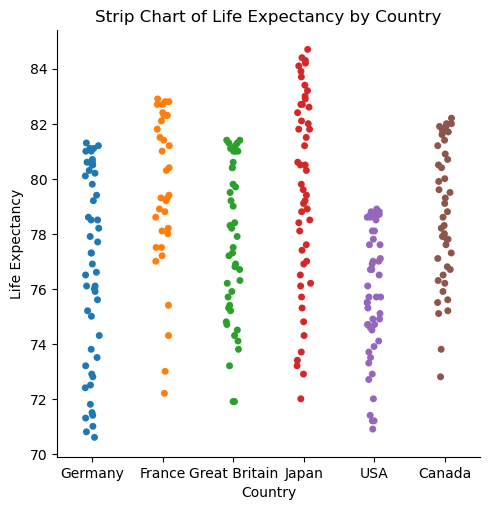

In [74]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='strip', hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Strip Chart of Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

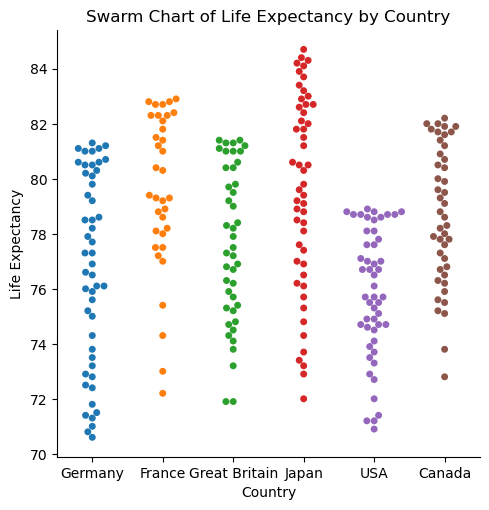

In [76]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='swarm', hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Swarm Chart of Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

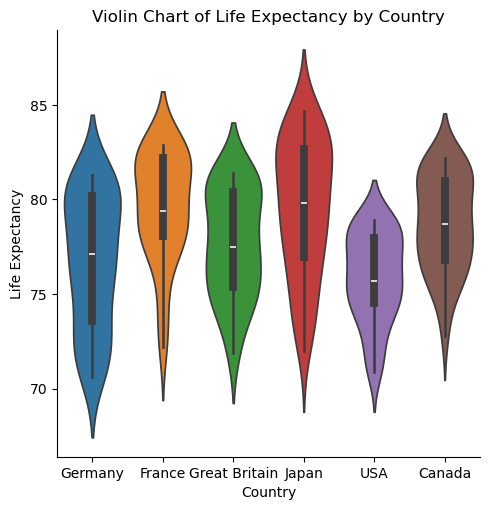

In [77]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='violin', hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Violin Chart of Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

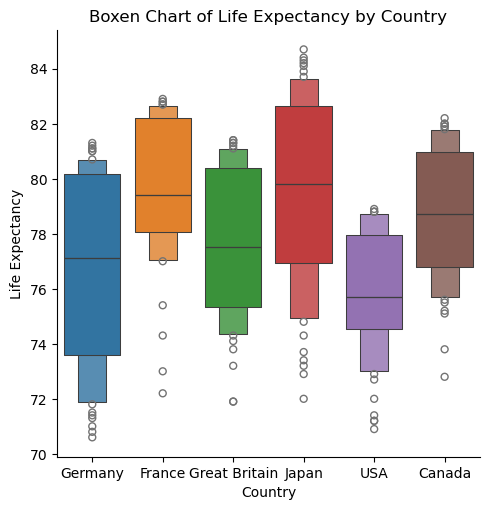

In [79]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='boxen', hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Boxen Chart of Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

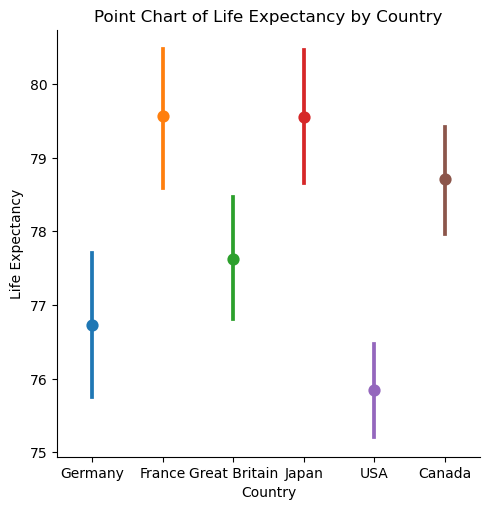

In [80]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='point', hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Point Chart of Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

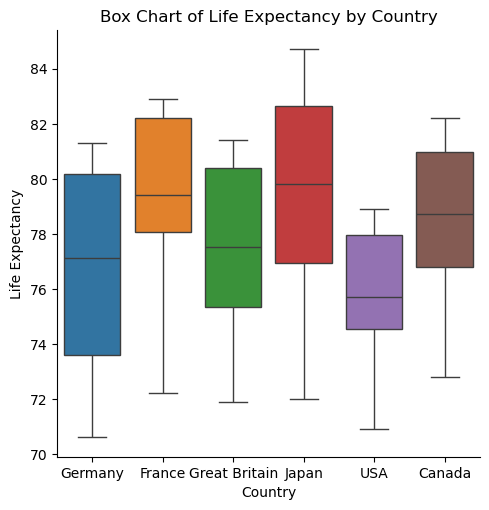

In [81]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='box', hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Box Chart of Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

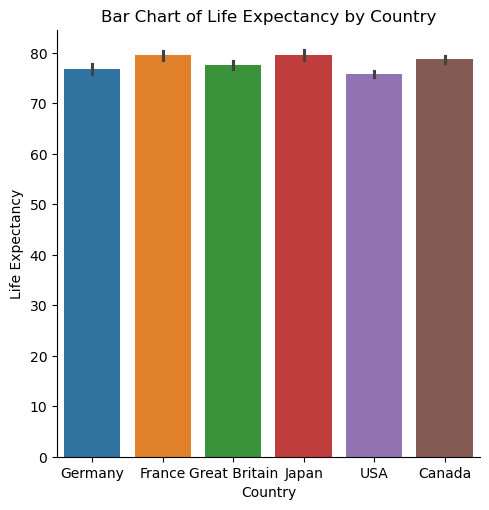

In [85]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='bar', hue=df.Country)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Bar Chart of Life Expectancy by Country')
plt.show()

<Figure size 1000x400 with 0 Axes>

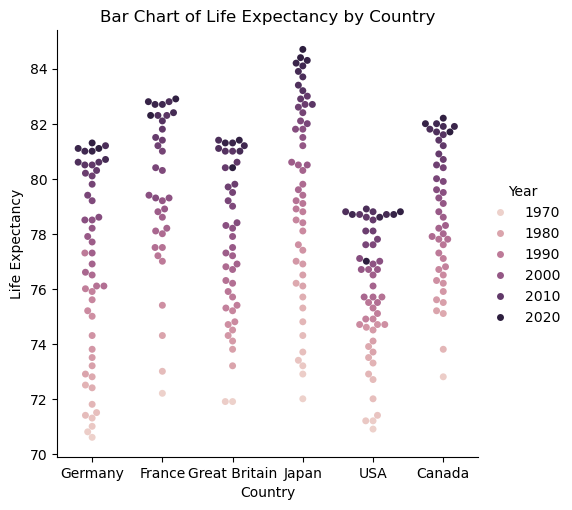

In [91]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x=df.Country,y=df.Life_Expectancy, kind='swarm', hue=df.Year)
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Bar Chart of Life Expectancy by Country')
plt.show()

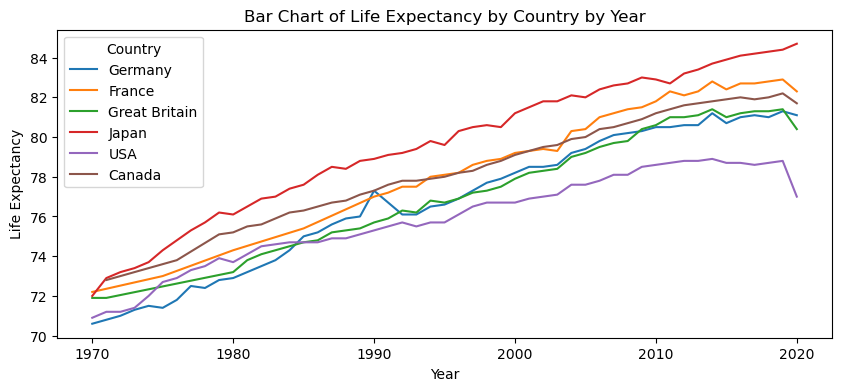

In [94]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Bar Chart of Life Expectancy by Country by Year')
plt.show()

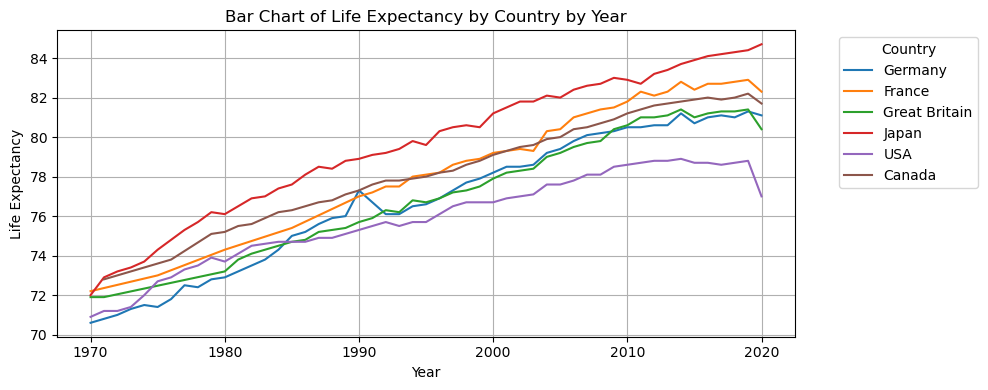

In [97]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Bar Chart of Life Expectancy by Country by Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()